In [285]:
import numpy as np
import pandas as pd
import random 

In [286]:
import pygad
import matplotlib.pyplot as plt

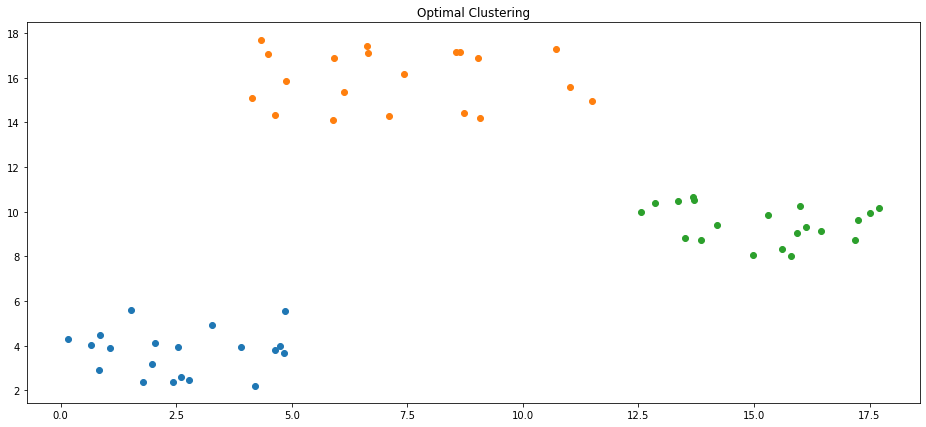

In [287]:
cluster1_num_samples = 20
cluster1_x1_start = 0
cluster1_x1_end = 5
cluster1_x2_start = 2
cluster1_x2_end = 6
cluster1_x1 = np.random.random(size=(cluster1_num_samples))
cluster1_x1 = cluster1_x1 * (cluster1_x1_end - cluster1_x1_start) + cluster1_x1_start
cluster1_x2 = np.random.random(size=(cluster1_num_samples))
cluster1_x2 = cluster1_x2 * (cluster1_x2_end - cluster1_x2_start) + cluster1_x2_start

cluster2_num_samples = 20
cluster2_x1_start = 4
cluster2_x1_end = 12
cluster2_x2_start = 14
cluster2_x2_end = 18
cluster2_x1 = np.random.random(size=(cluster2_num_samples))
cluster2_x1 = cluster2_x1 * (cluster2_x1_end - cluster2_x1_start) + cluster2_x1_start
cluster2_x2 = np.random.random(size=(cluster2_num_samples))
cluster2_x2 = cluster2_x2 * (cluster2_x2_end - cluster2_x2_start) + cluster2_x2_start

cluster3_num_samples = 20
cluster3_x1_start = 12
cluster3_x1_end = 18
cluster3_x2_start = 8
cluster3_x2_end = 11
cluster3_x1 = np.random.random(size=(cluster3_num_samples))
cluster3_x1 = cluster3_x1 * (cluster3_x1_end - cluster3_x1_start) + cluster3_x1_start
cluster3_x2 = np.random.random(size=(cluster3_num_samples))
cluster3_x2 = cluster3_x2 * (cluster3_x2_end - cluster3_x2_start) + cluster3_x2_start

c1 = np.array([cluster1_x1, cluster1_x2]).T
c2 = np.array([cluster2_x1, cluster2_x2]).T
c3 = np.array([cluster3_x1, cluster3_x2]).T

data = np.concatenate((c1, c2, c3), axis=0)

fig,ax=plt.subplots(figsize=(16,7))

plt.scatter(cluster1_x1, cluster1_x2)
plt.scatter(cluster2_x1, cluster2_x2)
plt.scatter(cluster3_x1, cluster3_x2)
plt.title("Optimal Clustering")
plt.show()


In [288]:
points=data.tolist()

# Reprezentacija jedinke:

In [289]:
class Individual:
    def __init__(self,points,num_clusters):
        #inicijalizujemo jedinke kao listu slucajnoodabranih tacaka duzine broja klastera:
        self.code=[points[random.randrange(len(points))] for _ in range(num_clusters)] 
        self.fitness = self.calcFitness(points,num_clusters)
        #self.centroids=self.calculateCentroids(points)
        
    def __lt__(self, other):
        return self.fitness < other.fitness
    
    
    def ed(self,a,b):
        a=np.array(a)
        b=np.array(b)
        dist=np.linalg.norm(a-b)
        
        return dist
    #odredjuje kom klasteru pripada tacka point:
    def cluster_id(self,point,centers):
        d=float('inf')
        index=-1
        best_d=float('inf')
        
        for i,c in enumerate(centers):
            new_d=self.ed(point,c)
            if new_d<best_d:
                best_d=new_d
                index=i
   
        return index
        
    def sse_partial(self,points,cluster_index):
        #s=0
        sc=0
        
        for p in points:
            if self.cluster_id(p,self.code)==cluster_index:
                sc+=(self.ed(p,self.code[cluster_index]))**2
                #if p[-1]==cluster_index:
            
        return sc
    
    #SSE(Sum squared error)-metrika koju koristimo za racunanje fitness-a
    def sse(self,points,num_clusters):
        s=0
        for k in range(num_clusters):
            s+=self.sse_partial(points,k)
        
        return s
   

    def calcFitness(self,points,num_clusters):
        
        error=self.sse(points,num_clusters)
        fitness=1/error
        
        return fitness


In [290]:
def readFile(filename):
    with open(filename, 'r') as f:
        num_points,dim=[int(x) for x in f.readline().split()]
        points=[[float(x) for x in f.readline().split()] for _ in range(num_points)]
        return points

In [291]:
# points=readFile("input2.txt")
# points=readFile("input3.txt")

In [292]:
# points

In [293]:
num_points=len(points)
num_dimensions=len(points[0])
print(num_points,num_dimensions)

60 2


In [294]:
#Eucledian distance-Euklidsko rastojanje
def ed(a,b):
    a=np.array(a)
    b=np.array(b)
    dist=np.linalg.norm(a-b)
    return dist

In [295]:
print(ed(points[1],points[2]))

4.569129874172381


In [296]:
def cluster_id(point,centers):
    d=float('inf')
    index=-1
    best_d=float('inf')
    for i,c in enumerate(centers):
        new_d=ed(point,c)
        if new_d<best_d:
            best_d=new_d
            index=i
            
    return index

In [297]:
def crossover(parent1,parent2,child1,child2):
    breakpoint = random.randrange(len(parent1.code))
    
    child1.code[:breakpoint] = parent1.code[:breakpoint]
    child2.code[:breakpoint] = parent2.code[:breakpoint]
    
    child1.code[breakpoint:] = parent2.code[breakpoint:]
    child2.code[breakpoint:] = parent1.code[breakpoint:]
    
    #print(breakpoint)

In [298]:
def selection(population):
    
    TOURNAMENT_SIZE = 5
    bestFitness = float('-inf')
    index = -1
    for i in range(TOURNAMENT_SIZE):
        randomIndividual = random.randrange(len(population))
        if population[randomIndividual].fitness > bestFitness:
            bestFitness = population[randomIndividual].fitness
            index = randomIndividual
    return index
    
    
    #biramo random predstavnika za svaki klaster
    #koji ce se vremenom unaprediti i tako ce napredovati ceo proces

In [299]:
def mutation(individual):
    #alfa=random vrednost kojom ce se za neki vektor pomeriti trenutni centar klastera
    #c_a =random int koji uz alfa utice na pomeraj centra
    #kao parametar/verovatnocu mutacije uzimamo 5% (MUTATION_RATE=0.05)
    MUTATION_PROB=0.05
    
    for i in range(len(individual.code)):
        l=np.array(individual.code[i])
        alpha=random.uniform(0,1)
        c_a=random.randint(0,3)
        znak=random.uniform(0,1)
        if random.random()<MUTATION_PROB:
            if znak>=0.5:
                l=l+(alpha*c_a)
                l=np.round(l,2)
                individual.code[i]=l.tolist()
            else:
                l=l - (alpha*c_a)
                l=np.round(l,2)
                individual.code[i]=l.tolist()
    

In [300]:
# points=data.tolist()

# Parametri genetskog algoritma:


In [301]:
POPULATION_SIZE = 50
NUM_GENERATIONS = 30
ELITISIM_SIZE = POPULATION_SIZE // 5
num_clusters=3

In [ ]:

population = [Individual(points,num_clusters) for _ in range(POPULATION_SIZE)]
newPopulation = [Individual(points,num_clusters) for _ in range(POPULATION_SIZE)]

for i in range(NUM_GENERATIONS):
    population.sort(reverse=True)
    newPopulation[:ELITISIM_SIZE] = population[:ELITISIM_SIZE]
    
    for j in range(ELITISIM_SIZE, POPULATION_SIZE, 2):
        
        parent1Index = selection(population)
        parent2Index = selection(population)
        
        crossover(population[parent1Index], population[parent2Index], newPopulation[j], newPopulation[j+1])
        
        #print(j)
        #print(population[parent1Index].code)
        #print(population[parent2Index].code)
        mutation(newPopulation[j])
        mutation(newPopulation[j+1])
        
        newPopulation[j].fitness = newPopulation[j].calcFitness(points,num_clusters)
        newPopulation[j+1].fitness = newPopulation[j+1].calcFitness(points,num_clusters)
        
#         print(j)
#         print(newPopulation[j].code)
#         print(newPopulation[j+1].code)
#         print()
#         print()
        
    population = newPopulation

    
bestIndividual = max(population)
print(f'solution: {bestIndividual.code}, fitness: {bestIndividual.fitness}')

In [270]:
cluster_centers=bestIndividual.code
cluster_centers

[[8.93, 15.9], [14.38, 10.21], [2.44, 3.9]]

In [271]:
#Svakoj tacki skupa Points dodajemo kao poslednji element redni nroj klastera kome bi trebalo da odgovaraju
def assign_center(points,centers):
    best_d=float("inf")
    ind=-1
    n=len(points[0])
    
    for p in points:
        best_d=float('inf')
        for j,c in enumerate(centers):
            if(len(p)==n and len(c)==n):
                d_new=ed(p,c)
            
                if d_new<best_d:
                    ind=j
                    best_d=d_new    
                    
        p.append(ind)
        

In [272]:
print(points[0],points[-1])


[0.1505344322292923, 5.469351776496584] [12.795096558946327, 9.333333106767189]


In [273]:
assign_center(points,cluster_centers)
# points

In [274]:
print(points[0],points[-1])


[0.1505344322292923, 5.469351776496584, 2] [12.795096558946327, 9.333333106767189, 1]


In [275]:
#pravimo matricu u kojoj svaki red predstavlja listu tacaka za svaki klaster redom
def create_cluster_arrays(points,centers):
    a=[]
    b=[]
    c=[]
    M=[]
    num_clusters=len(centers)
    for p in points:
        if p[-1]==0:
            a.append(p)
    
    #a=np.array(a)
    
    for p in points:
        if p[-1]==1:
            b.append(p)
    
    #b=np.array(a)
#     M=np.vstack((a,b))
    M.append(a)
    M.append(b)
    
    for i in range(num_clusters): 
        c.clear()
        for p in points:
            if p[-1]==i and i!=0 and i!=1:
                c.append(p)
#         c=np.array(c)        
        M.append(c)
    
    return M

In [276]:
M=create_cluster_arrays(points,cluster_centers)
M[0]

[[9.221340815993813, 14.900377593311507, 0],
 [7.708460015704676, 14.529944181140017, 0],
 [11.189138947361918, 16.19193445619334, 0],
 [7.611149221298835, 16.99330258033013, 0],
 [8.143278150673403, 14.101799112518188, 0],
 [10.354388732473318, 16.49579515931865, 0],
 [9.897720240442787, 15.098447878222427, 0],
 [5.965790555111497, 14.12470095754, 0],
 [6.074765350421802, 15.426717559747427, 0],
 [4.836669428901524, 15.1224030632317, 0],
 [10.896932680829131, 14.737048839037833, 0],
 [7.918407224040253, 17.211137852504418, 0],
 [11.812486997304578, 16.180392581872205, 0],
 [4.2767793633744065, 15.898635200835376, 0],
 [10.113723465392338, 17.903002021042056, 0],
 [8.10470648477503, 15.691282951534982, 0],
 [10.597915465298211, 17.597666173560278, 0],
 [11.304028690100544, 16.714113400866662, 0],
 [9.571301857874829, 16.53890027248935, 0],
 [9.024961334747687, 16.497530273528938, 0]]

# ISCRTAVANJE DOBIJENIH KLASTERA I NJIHOVIH CENTARA:

In [277]:
import matplotlib.pyplot as plt

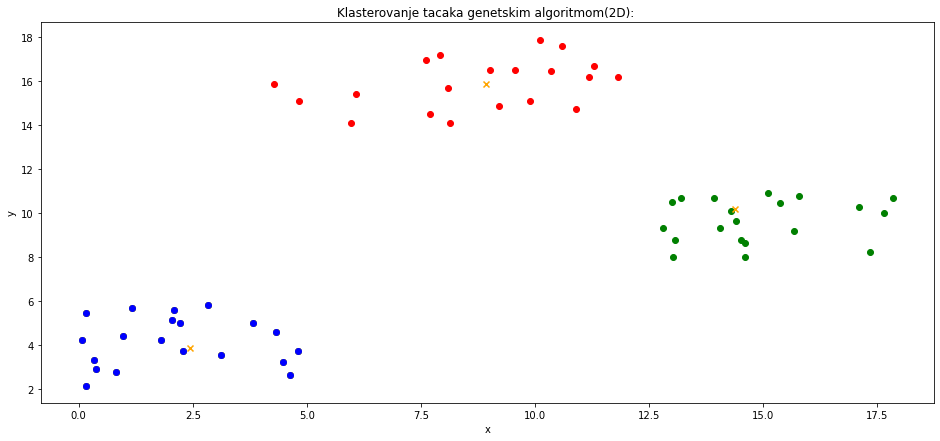

In [278]:
if num_dimensions==2:
    fig,ax=plt.subplots(figsize=(16,7))
    ax.set_title("Klasterovanje tacaka genetskim algoritmom(2D): ")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    colors=["red","green","black","yellow","blue"]
    for i in range(len(M)):
        for j in range(len(M[i])):
            plt.scatter(((M[i])[j])[0],((M[i])[j])[1],c=colors[i])

    for j in range(num_clusters):
        plt.scatter((cluster_centers[j])[0],(cluster_centers[j])[1],c="orange",marker="x")
        
elif num_dimensions==3:
    fig=plt.figure(figsize=(16,7))
    ax=fig.add_subplot(111,projection='3d')
    ax.set_title("Klasterovanje tacaka genetskim algoritmom(3D): ")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    colors=["red","green","black","yellow","blue"]
    for i in range(len(M)):
        for j in range(len(M[i])):
            ax.scatter(((M[i])[j])[0],((M[i])[j])[1],((M[i])[j])[2],c=colors[i])

    for j in range(num_clusters):
        ax.scatter((cluster_centers[j])[0],(cluster_centers[j])[1],(cluster_centers[j])[2],c="orange",marker="x")

In [996]:
# points_tmp=points

# for p in points_tmp:
#     p.append(-1)
    
# #points_tmp[0].pop()
# #del points_tmp[0][-1]
# print(points_tmp[2][-1])
# print(points)
# print((points_tmp[2])[:-1])
# print(points_tmp)
